<h1><center>Assignment 2 - Activity Recognition</center><h1>

Name : Varun Ramesh
<br>ID : s3797675

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Retrieving-Data-and-Data-Preparation" data-toc-modified-id="Retrieving-Data-and-Data-Preparation-1">Retrieving Data and Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1.1">Data Preparation</a></span></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2">Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Exploration-between-attributes" data-toc-modified-id="Exploration-between-attributes-2.1">Exploration between attributes</a></span></li></ul></li><li><span><a href="#Data-Modeling" data-toc-modified-id="Data-Modeling-3">Data Modeling</a></span><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3.1">Data Preparation</a></span></li><li><span><a href="#Scaling-Features" data-toc-modified-id="Scaling-Features-3.2">Scaling Features</a></span></li><li><span><a href="#Fitting-a-classifier" data-toc-modified-id="Fitting-a-classifier-3.3">Fitting a classifier</a></span><ul class="toc-item"><li><span><a href="#K-Nearest-Neighbor-Classifier" data-toc-modified-id="K-Nearest-Neighbor-Classifier-3.3.1">K-Nearest-Neighbor Classifier</a></span></li><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-3.3.2">Decision Tree Classifier</a></span></li></ul></li><li><span><a href="#Hyper-Parameter-Tuning" data-toc-modified-id="Hyper-Parameter-Tuning-3.4">Hyper-Parameter Tuning</a></span><ul class="toc-item"><li><span><a href="#K-Nearest-Neighbor-Classifier" data-toc-modified-id="K-Nearest-Neighbor-Classifier-3.4.1">K-Nearest-Neighbor Classifier</a></span></li><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-3.4.2">Decision Tree Classifier</a></span></li></ul></li><li><span><a href="#Predicting" data-toc-modified-id="Predicting-3.5">Predicting</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)

C:\Users\varun\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Retrieving Data and Data Preparation

In [2]:
one = pd.read_csv('1.csv', names=["Sequence", "x_acceleration", "y_acceleration", "z_acceleration","Labels"])
one.drop('Sequence', axis = 1, inplace = True)

two = pd.read_csv('2.csv', names=["Sequence", "x_acceleration", "y_acceleration", "z_acceleration","Labels"])
two.drop('Sequence', axis = 1, inplace = True)

three = pd.read_csv('3.csv', names=["Sequence", "x_acceleration", "y_acceleration", "z_acceleration","Labels"])
three.drop('Sequence', axis = 1, inplace = True)

four = pd.read_csv('4.csv', names=["Sequence", "x_acceleration", "y_acceleration", "z_acceleration","Labels"])
four.drop('Sequence', axis = 1, inplace = True)

five = pd.read_csv('5.csv', names=["Sequence", "x_acceleration", "y_acceleration", "z_acceleration","Labels"])
five.drop('Sequence', axis = 1, inplace = True)

six = pd.read_csv('6.csv', names=["Sequence", "x_acceleration", "y_acceleration", "z_acceleration","Labels"])
six.drop('Sequence', axis = 1, inplace = True)

seven = pd.read_csv('7.csv', names=["Sequence", "x_acceleration", "y_acceleration", "z_acceleration","Labels"])
seven.drop('Sequence', axis = 1, inplace = True)

eight = pd.read_csv('8.csv', names=["Sequence", "x_acceleration", "y_acceleration", "z_acceleration","Labels"])
eight.drop('Sequence', axis = 1, inplace = True)

nine = pd.read_csv('9.csv', names=["Sequence", "x_acceleration", "y_acceleration", "z_acceleration","Labels"])
nine.drop('Sequence', axis = 1, inplace = True)

ten = pd.read_csv('10.csv', names=["Sequence", "x_acceleration", "y_acceleration", "z_acceleration","Labels"])
ten.drop('Sequence', axis = 1, inplace = True)

eleven = pd.read_csv('11.csv', names=["Sequence", "x_acceleration", "y_acceleration", "z_acceleration","Labels"])
eleven.drop('Sequence', axis = 1, inplace = True)

twelve = pd.read_csv('12.csv', names=["Sequence", "x_acceleration", "y_acceleration", "z_acceleration","Labels"])
twelve.drop('Sequence', axis = 1, inplace = True)

thirteen = pd.read_csv('13.csv', names=["Sequence", "x_acceleration", "y_acceleration", "z_acceleration","Labels"])
thirteen.drop('Sequence', axis = 1, inplace = True)

fourteen = pd.read_csv('14.csv', names=["Sequence", "x_acceleration", "y_acceleration", "z_acceleration","Labels"])
fourteen.drop('Sequence', axis = 1, inplace = True)

fifteen = pd.read_csv('15.csv', names=["Sequence", "x_acceleration", "y_acceleration", "z_acceleration","Labels"])
fifteen.drop('Sequence', axis = 1, inplace = True)

In [3]:
one['Person'] = 1
two['Person'] = 2
three['Person'] = 3
four['Person'] = 4
five['Person'] = 5
six['Person'] = 6
seven['Person'] = 7
eight['Person'] = 8
nine['Person'] = 9
ten['Person'] = 10
eleven['Person'] = 11
twelve['Person'] = 12
thirteen['Person'] = 13
fourteen['Person'] = 14
fifteen['Person'] = 15


In [4]:
frames = [one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve ,thirteen,fourteen , fifteen]

df= pd.concat(frames)

df.shape

(1926896, 5)

### Data Preparation

In [5]:
df_rnd = df.sample(n=100000, random_state=6758)

In [6]:
df_rnd.dtypes

x_acceleration    int64
y_acceleration    int64
z_acceleration    int64
Labels            int64
Person            int64
dtype: object

In [7]:
df_rnd.isna().sum()

x_acceleration    0
y_acceleration    0
z_acceleration    0
Labels            0
Person            0
dtype: int64

In [8]:
df_rnd = df_rnd[df_rnd.Labels != 0] #Removing rows which had label zero 

In [9]:
df_rnd['Labels'].value_counts()

1    31627
7    30770
4    18590
3    11178
5     2785
2     2498
6     2371
Name: Labels, dtype: int64

## Data Exploration

In [10]:
df_rnd.describe()

,x_acceleration,y_acceleration,z_acceleration,Labels,Person
count,99819.000000,99819.000000,99819.000000,99819.000000,99819.000000
mean,1987.307336,2381.967471,1970.829041,3.887617,7.518589
std,111.369988,100.211564,94.573223,2.438922,4.185780
min,483.000000,74.000000,1157.000000,1.000000,1.000000
25%,1904.000000,2337.000000,1918.000000,1.000000,4.000000
50%,1991.000000,2366.000000,1988.000000,4.000000,7.000000
75%,2076.000000,2411.000000,2033.000000,7.000000,11.000000
max,2895.000000,2968.000000,4095.000000,7.000000,15.000000


Populating a dataframe with means of each of the label. Let us call it means

Taking each of the labels and looking at the columns 

In [11]:
means = pd.DataFrame(columns = ['x_acceleration_mean','y_acceleration_mean','z_acceleration_mean','Labels'])
grouped = df.groupby(df.Labels)


lst = []
lst2 = []
lst3 = []
lst4 = []
for val in range(1,8):
    label = grouped.get_group(val)
    lst.append(label['x_acceleration'].mean())
    lst2.append(label['y_acceleration'].mean())
    lst3.append(label['z_acceleration'].mean())
    lst4.append(val)

means['x_acceleration_mean'] = lst
means['y_acceleration_mean'] = lst2
means['z_acceleration_mean'] = lst3
means['Labels'] = lst4

means

,x_acceleration_mean,y_acceleration_mean,z_acceleration_mean,Labels
0,1977.689653,2376.558532,1966.415593,1
1,1969.489431,2371.051965,1940.448703,2
2,1996.272755,2378.303095,1965.729391,3
3,1976.819111,2386.292905,1978.708646,4
4,2000.554449,2385.493844,1997.001573,5
5,2027.107076,2374.075277,1952.189366,6
6,1997.845983,2388.535898,1973.053026,7


<br>From the above means, it looks like y_acceleration is always more irrespective of the activity done. Looks like activity number 2 (Standing up, Walking and Going up\down the stairs is the least for all parameters). The label looks very inconclusive considering it has all the activities in it. 
<br>The highest value for z_acceleration is when the person is going up/down the stairs (label 5) 
<br>The hypothesis from y_acceleration mean is very inconclusive
<br> x_acceleration is the highest when the person in walking and going up/down the stairs (label 5,6) 

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

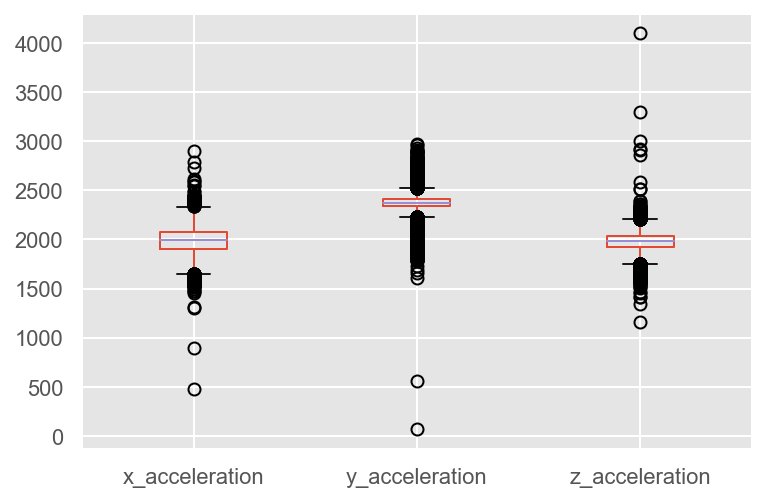

In [13]:
df_rnd.boxplot(column=['x_acceleration','y_acceleration','z_acceleration']);

Now let us see what happens if we remove the outliers. Doing this and seeing if there was any change to our means table. 

In [14]:
from scipy import stats
temp = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

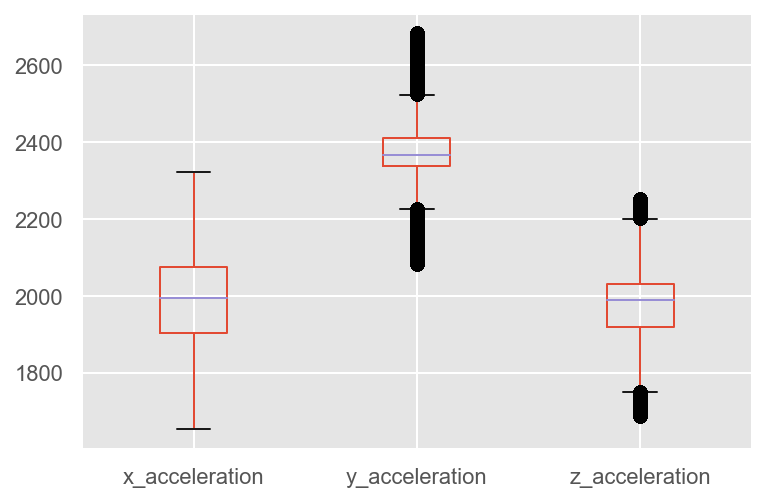

In [15]:
temp.boxplot(column=['x_acceleration','y_acceleration','z_acceleration']);

In [16]:
means = pd.DataFrame(columns = ['x_acceleration_mean','y_acceleration_mean','z_acceleration_mean','Labels'])
grouped = temp.groupby(temp.Labels)


lst = []
lst2 = []
lst3 = []
lst4 = []
for val in range(1,8):
    label = grouped.get_group(val)
    lst.append(label['x_acceleration'].mean())
    lst2.append(label['y_acceleration'].mean())
    lst3.append(label['z_acceleration'].mean())
    lst4.append(val)

means['x_acceleration_mean'] = lst
means['y_acceleration_mean'] = lst2
means['z_acceleration_mean'] = lst3
means['Labels'] = lst4

means

,x_acceleration_mean,y_acceleration_mean,z_acceleration_mean,Labels
0,1977.124868,2380.634526,1969.635385,1
1,1968.976390,2370.137015,1940.871289,2
2,1996.980548,2376.779558,1965.878496,3
3,1977.721802,2382.146119,1980.369508,4
4,2000.629027,2382.777215,1996.469772,5
5,2026.990742,2373.108891,1951.914391,6
6,2001.113811,2393.558041,1972.517494,7


It looks like there was no point removing the outliers as the average of each of the acceleration's are still the same. Thus we are going to proceed with the df_rnd where the outliers were not removed

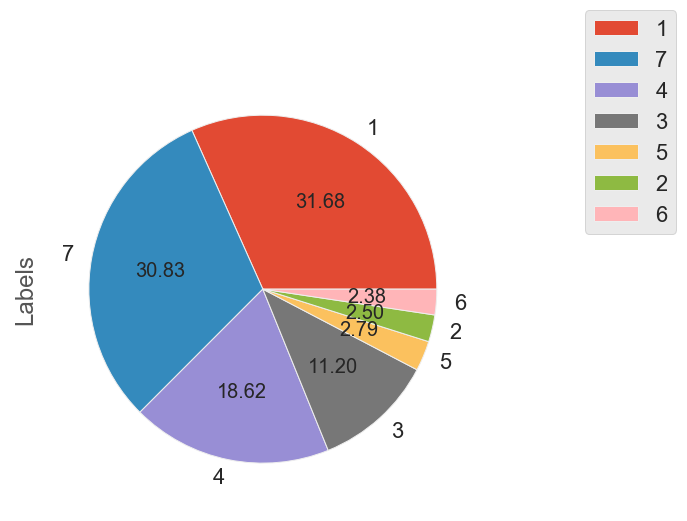

In [17]:
df_rnd['Labels'].value_counts().plot(kind='pie',autopct='%.2f')
plt.figlegend()
plt.show()

Here we can see that most of the values given are for 
<br>label 1 - Working on computer
<br>label 7 - Talking while standing 
<br>label 4 - Walking 

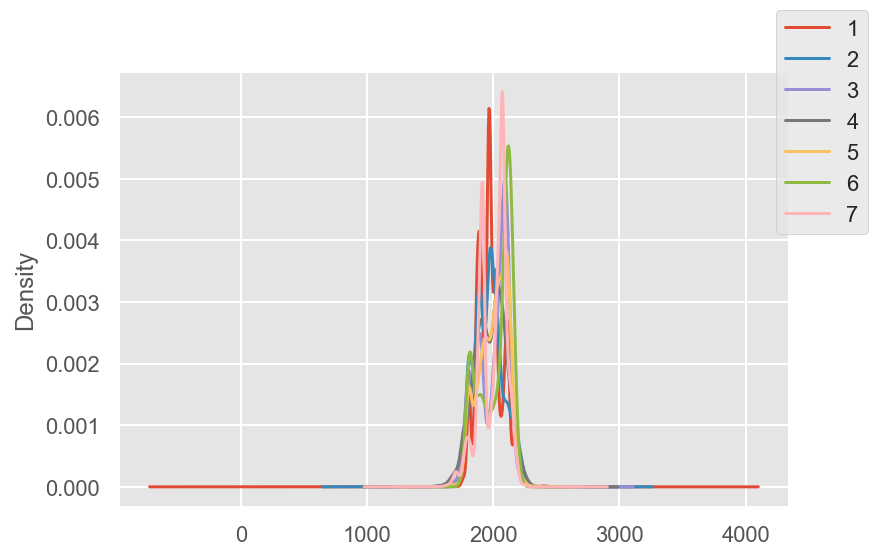

In [18]:
df_rnd.groupby('Labels')['x_acceleration'].plot.kde();
plt.autoscale(enable=True, axis= 'both',tight=None)
plt.figlegend();

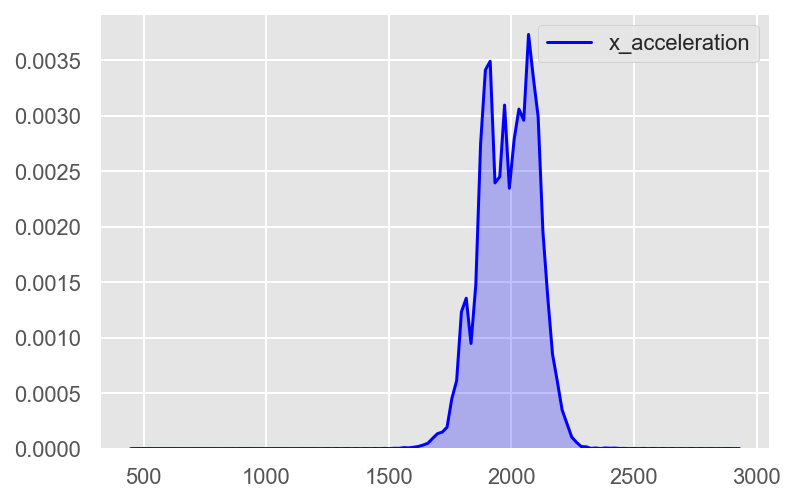

In [19]:
sns.kdeplot(df_rnd['x_acceleration'],shade = True, color = 'blue')

Comparing both these graphs, we can see that x_acceleration is the between 1600 - 2300. This is true for all the labels. However as we can see the pink line represents label 7 which is talking while standing. This has the highest probability for higher values. 

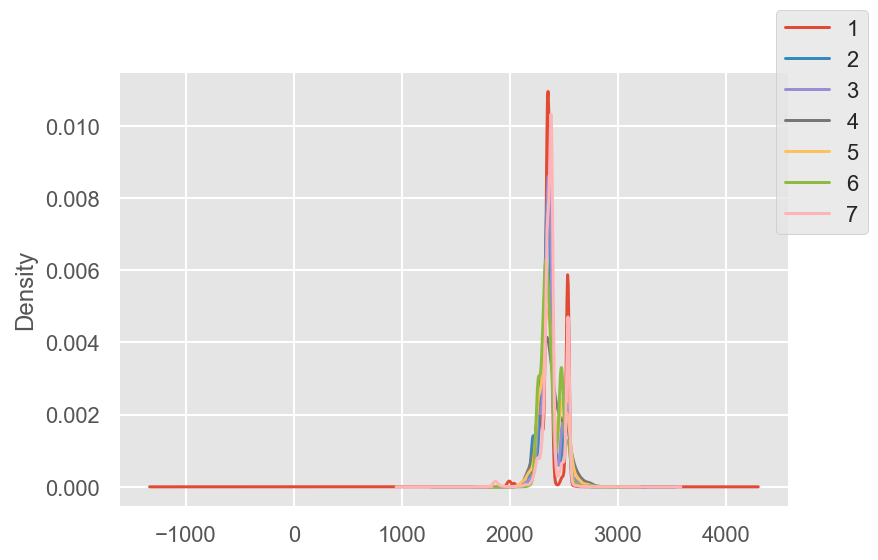

In [20]:
df_rnd.groupby('Labels')['y_acceleration'].plot.kde();
plt.figlegend();

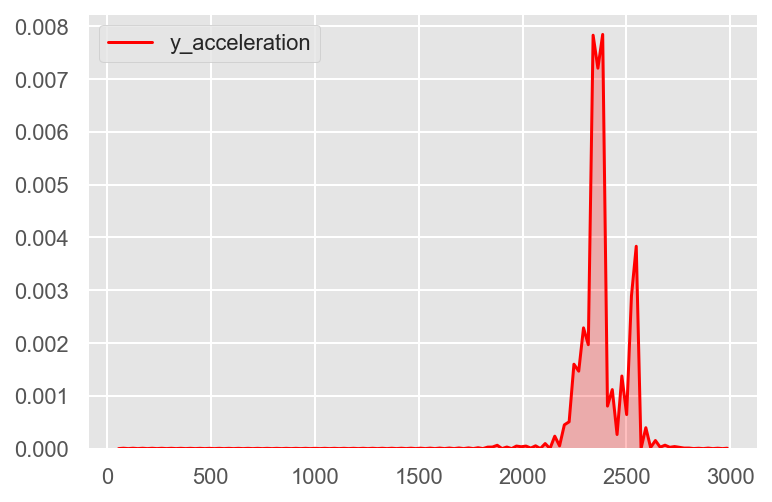

In [21]:
sns.kdeplot(df_rnd['y_acceleration'],shade = True, color = 'red')

We can see that most of the y_acceleration values lie from 2300 - 2700. Label 1 and 7 have the highest spike in the graph

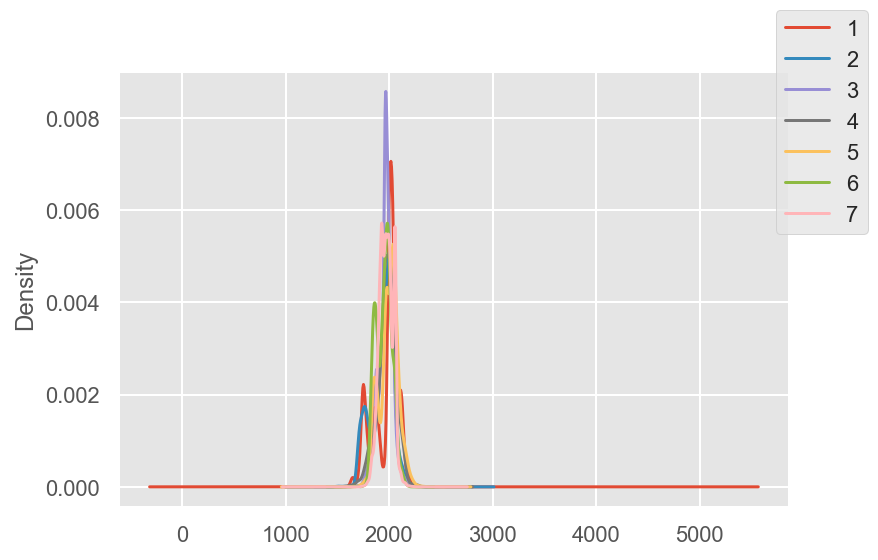

In [22]:
df_rnd.groupby('Labels')['z_acceleration'].plot.kde();
plt.autoscale(enable=True, axis= 'both',tight=None)
plt.figlegend();

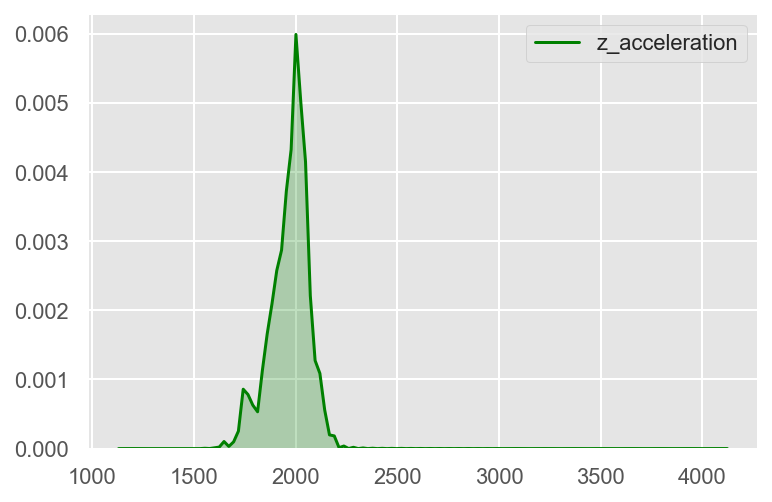

In [23]:
sns.kdeplot(df_rnd['z_acceleration'],shade = True, color = 'green')

As we can see, the majority of the values are between 1800 to 2200. The highest spike of accelerometer is noticed when standing up.

### Exploration between attributes

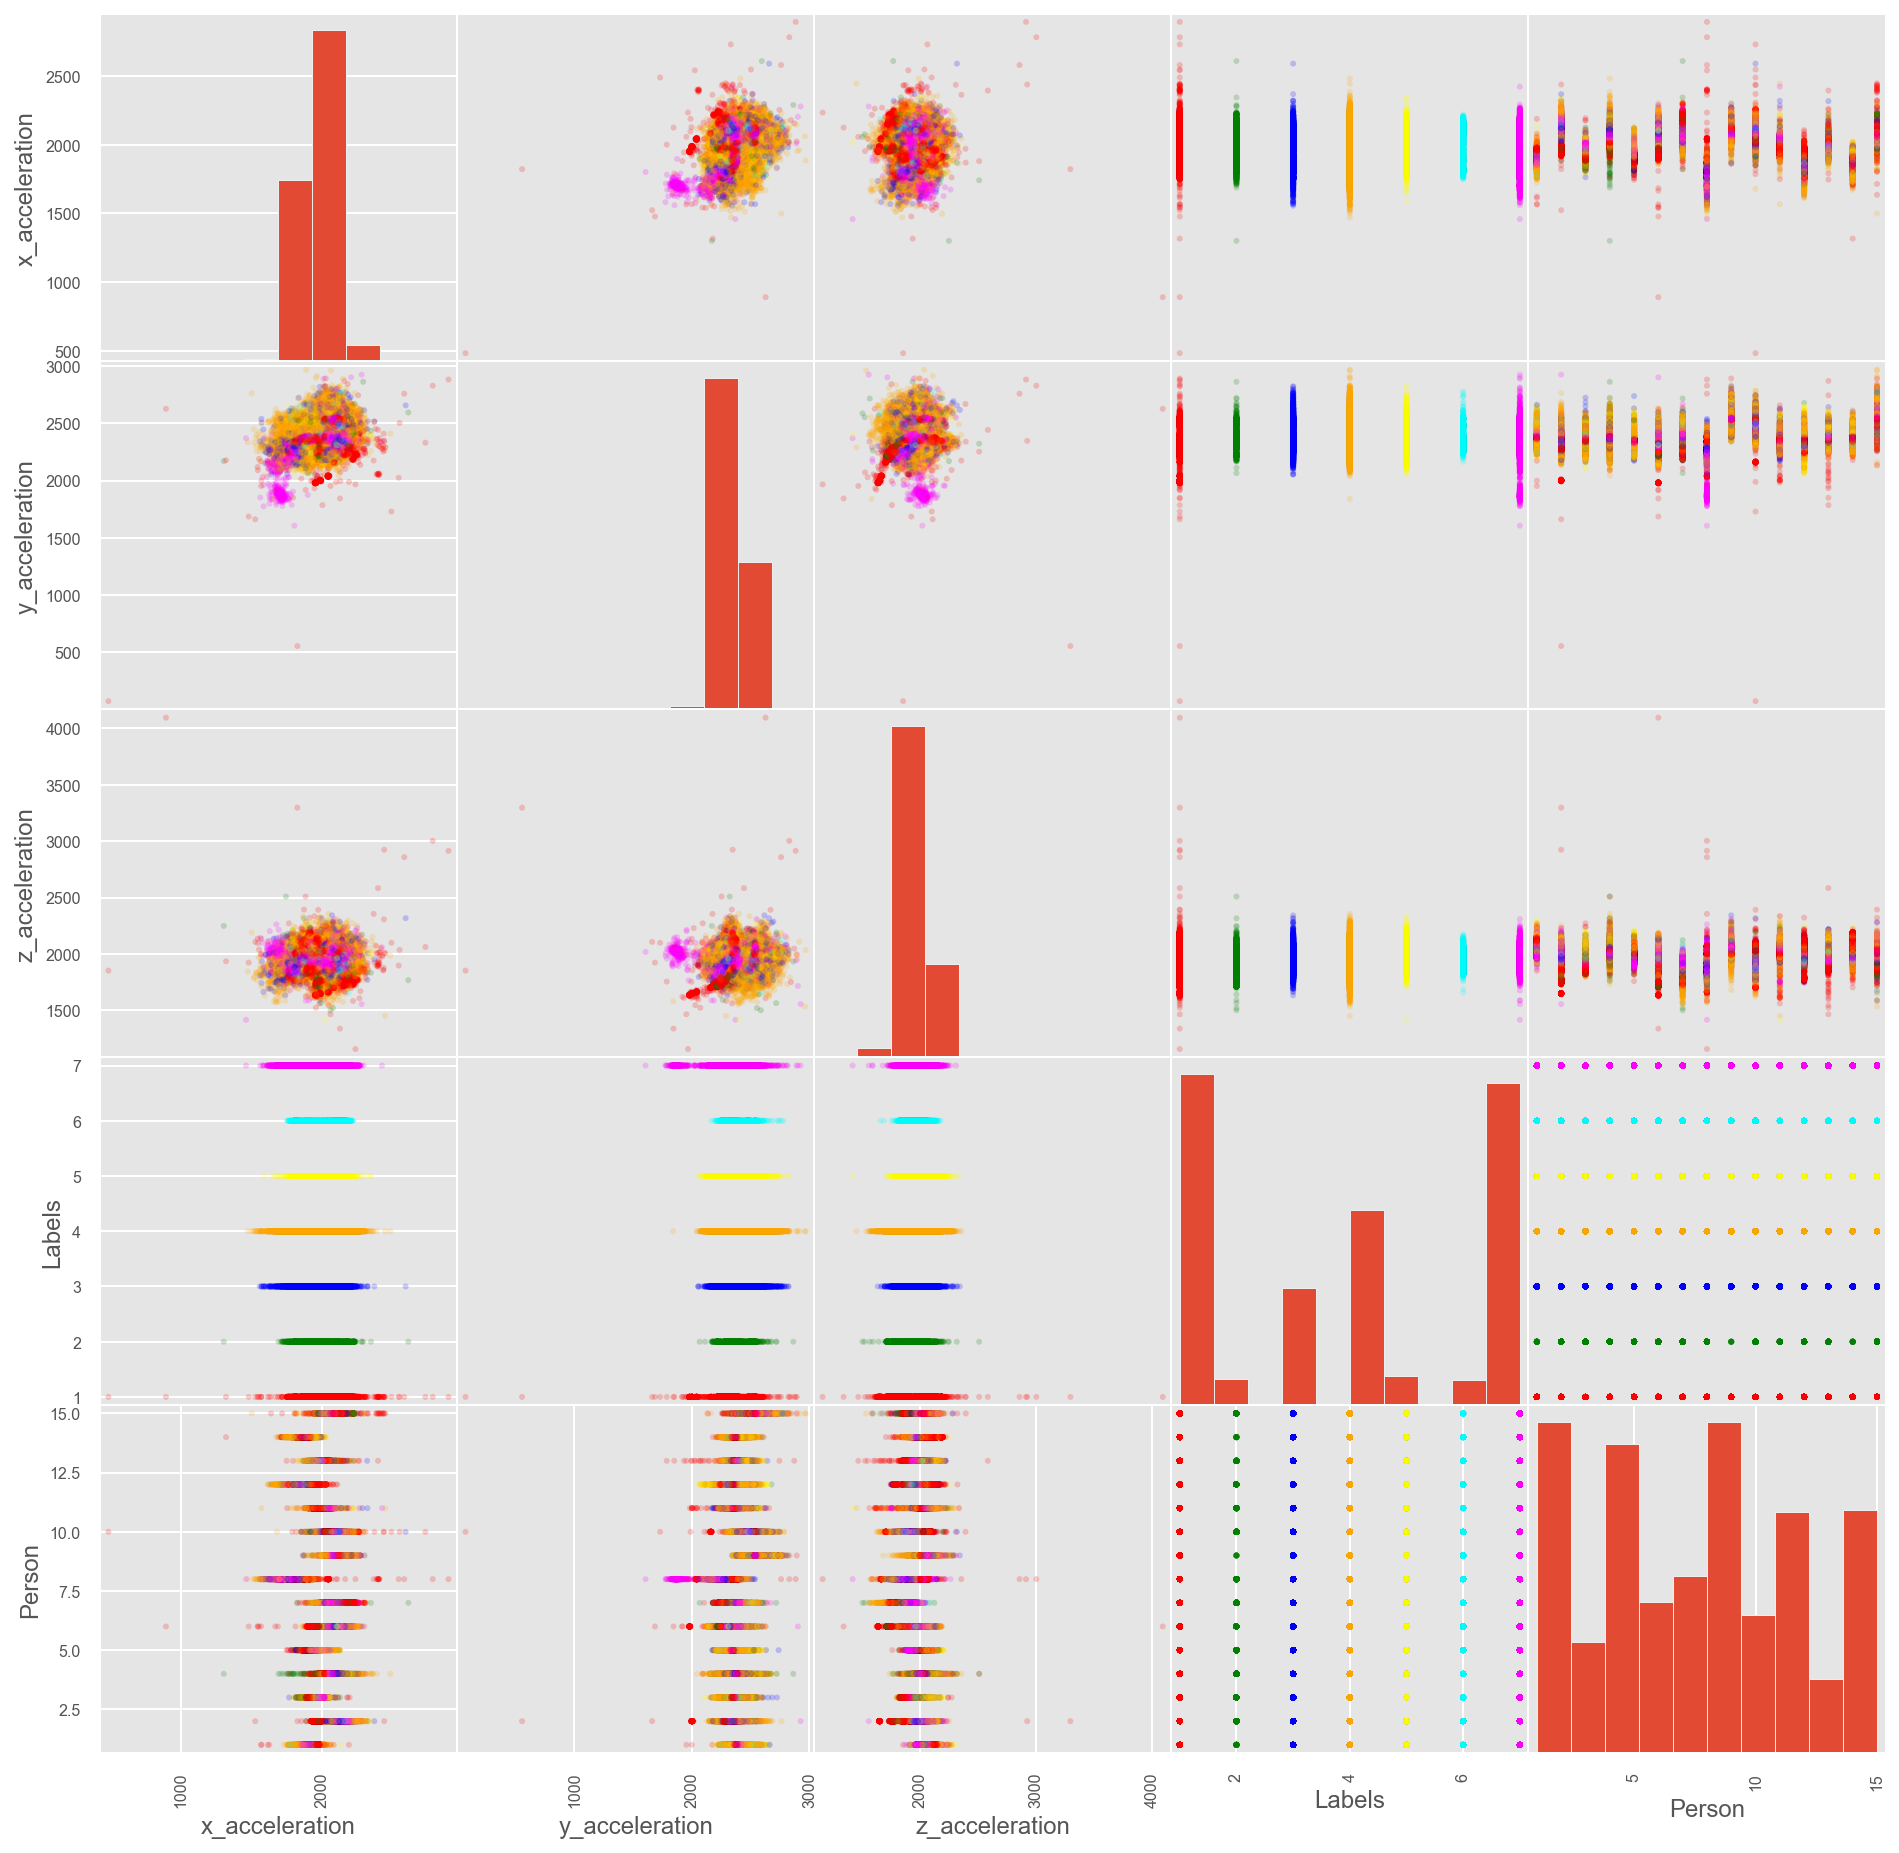

In [24]:
from pandas.plotting import scatter_matrix
colors_palette = {1: 'red', 2:'green',3:'blue',4:'orange',5:'yellow',6:'cyan',7:'magenta'}
colors = [colors_palette[c] for c in df_rnd['Labels']]
scatter_matrix(df_rnd, alpha = 0.2, figsize = (16,16), diagonal = 'hist',c=colors)
plt.show()

     1) We can notice from the scatter plots of each of the acceleration and between each other, there is not much                  correlation neither positively nor negatively
     2) Comparing the labels and the acceleration : we can notice sitting in the computer (label 1) has the most                    acceleration followed by talking while standing (label 7)


In [25]:
df_rnd.corr(method='pearson')

,x_acceleration,y_acceleration,z_acceleration,Labels,Person
x_acceleration,1.000000,0.371044,0.015191,0.079724,-0.018510
y_acceleration,0.371044,1.000000,0.340963,0.044100,0.284180
z_acceleration,0.015191,0.340963,1.000000,0.030303,0.127364
Labels,0.079724,0.044100,0.030303,1.000000,-0.174606
Person,-0.018510,0.284180,0.127364,-0.174606,1.000000


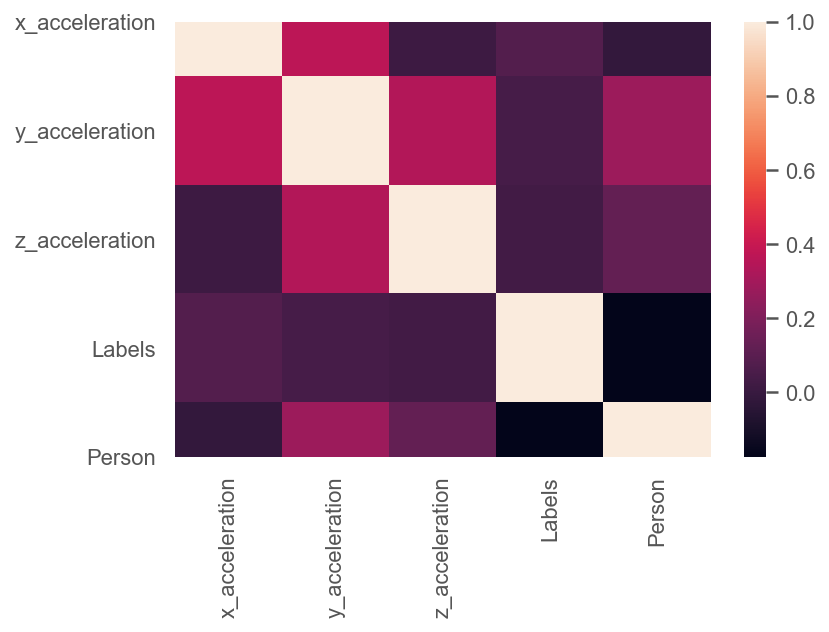

In [26]:
sns.heatmap(df_rnd.corr(method='pearson'))

We can see from the heat map that there is close to 0.5 correlation on an average between the accelerations and close to 0.1 correlation between the labels and the acceleration. 

## Data Modeling

The sampled dataset which is present right now is a numerical descriptive feature. So thereby scaling descriptive features, we can then train them on a classification model. 



###  Data Preparation

In [27]:
df['Labels'].value_counts()

1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
0      3719
Name: Labels, dtype: int64

In [28]:
Data = df_rnd.drop(columns = ['Person','Labels']).values
target = df_rnd['Labels'].values

In [29]:
from sklearn import preprocessing

target =  preprocessing.LabelEncoder().fit_transform(target)

In [30]:
np.unique(target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([31627,  2498, 11178, 18590,  2785,  2371, 30770], dtype=int64))

We can see that label encoding has been done properly where 1 from  df_rnd is 0 in target, 2 from df_rnd is 1 and so on  

### Scaling Features

In [31]:
#Using standard scaling techniques

Data = preprocessing.StandardScaler().fit_transform(Data)

Scaling each of these descriptive feature is done by :  $\mbox{scaled_value} = \frac{\mbox{value - mean}}{\mbox{std. dev.}}$

In [32]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train, t_test = train_test_split(Data,
                                                   target,
                                                   test_size = 0.3,
                                                   random_state = 6758)

### Fitting a classifier

#### K-Nearest-Neighbor Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(D_train, t_train)
kNN = knn_classifier.score(D_test, t_test)
print('KNN Classifier : ', kNN)

KNN Classifier :  0.7180257797368597


#### Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state= 6758)
dt_classifier.fit(D_train, t_train)
dT = dt_classifier.score(D_test, t_test)
print('DecisionTreeClassifier : ', dT)

DecisionTreeClassifier :  0.51829960595739


We can see that the accuracy is very less for both the cases without feeding in any parameters. Let us fine tune our parameters to see if we can fair better. 

### Hyper-Parameter Tuning 

#### K-Nearest-Neighbor Classifier

In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state= 6758)

In [36]:
import numpy as np
params_KNN = {'n_neighbors': [1,3, 5, 7, 11, 15, 20, 25], 
              'p': [1, 2, 5]}

Feeding in 1-7 nearest neighbors and giving Euclidean, Manhattan and Minkowski distance as p values

In [37]:
from sklearn.model_selection import GridSearchCV

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy',
                      n_jobs= -2,
                      return_train_score=True)

In [38]:
gs_KNN.fit(Data, target);

Fitting 15 folds for each of 24 candidates, totalling 360 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done 360 out of 360 | elapsed:  2.8min finished


In [39]:
gs_KNN.best_params_

{'n_neighbors': 20, 'p': 2}

In [40]:
gs_KNN.best_score_

0.741341828709965

In [41]:
gs_KNN.cv_results_['mean_test_score']

array([0.65985768, 0.66025506, 0.66022835, 0.6971652 , 0.6978264 ,
       0.69748912, 0.72045402, 0.72097163, 0.72108516, 0.73028849,
       0.73051557, 0.7302384 , 0.73800913, 0.73837312, 0.73796572,
       0.73947512, 0.74054372, 0.74045689, 0.74098785, 0.74134183,
       0.7410847 , 0.74093442, 0.74129842, 0.74101791])

In [42]:
import pandas as pd

results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])

In [43]:
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']

In [44]:
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN

,n_neighbors,p,test_score,metric
0,1,1,0.659858,Manhattan
1,1,2,0.660255,Euclidean
2,1,5,0.660228,Minkowski
3,3,1,0.697165,Manhattan
4,3,2,0.697826,Euclidean
5,3,5,0.697489,Minkowski
6,5,1,0.720454,Manhattan
7,5,2,0.720972,Euclidean
8,5,5,0.721085,Minkowski
9,7,1,0.730288,Manhattan


In [45]:
import altair as alt
alt.renderers.enable('html')

alt.Chart(results_KNN, 
          title='KNN Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('n_neighbors', title='Number of Neighbors'),
    alt.Y('test_score', title='Mean CV Score', scale=alt.Scale(zero=False)),
    color='metric'
).interactive()

alt.Chart(...)

We can see that the mean CV score always increases with respect to number of neighbors. This can lead to overfitting which should be avoided. 

#### Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=6758)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [5, 6, 7, 8, 10 , 12, 15, 17],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1,
                     n_jobs=-2,
                     scoring='accuracy')

gs_DT.fit(Data, target);

Fitting 15 folds for each of 32 candidates, totalling 480 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 334 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-2)]: Done 480 out of 480 | elapsed:   10.1s finished


In [47]:
gs_DT.best_params_

{'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 3}

In [48]:
gs_DT.best_score_

0.7136717458600066

In [49]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

In [50]:
alt.Chart(results_DT, 
          title='DT Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('max_depth', title='Maximum Depth'),
    alt.Y('test_score', title='Mean CV Score', aggregate='average', scale=alt.Scale(zero=False)),
    color='criterion'
).interactive()

alt.Chart(...)

As we can see, as the maximum depth increases the mean CV score also increases. An accuracy of 66.7% after hyper parameter tuning is good. 

### Predicting 

Since we could conclude that the accuracy for KNN is much higher than Decision Tree, predicting the values with KNN is much more efficient. But however we will predict using both to compare both the scores. 

In [51]:
t_pred_knn = gs_KNN.predict(D_test)

In [52]:
from sklearn import metrics
print('KNN Predicted accuracy score: ',metrics.accuracy_score(t_test, t_pred_knn))

KNN Predicted accuracy score:  0.7560609096373472


In [53]:
t_pred_dt = gs_DT.predict(D_test)

In [54]:
print('DecisionTree accuracy score : ',metrics.accuracy_score(t_test,t_pred_dt))

DecisionTree accuracy score :  0.7497161557470113


In [55]:
# Classification report for KNN 

print(metrics.classification_report(t_test, t_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      9411
           1       0.59      0.15      0.24       747
           2       0.62      0.50      0.55      3438
           3       0.66      0.74      0.70      5515
           4       0.41      0.10      0.17       836
           5       0.56      0.19      0.28       750
           6       0.78      0.85      0.81      9249

    accuracy                           0.76     29946
   macro avg       0.64      0.49      0.52     29946
weighted avg       0.74      0.76      0.74     29946



In [56]:
print(metrics.confusion_matrix(t_test, t_pred_knn))

[[8674   39   98  224    6    4  366]
 [ 320  114   41  139    4    1  128]
 [ 223   10 1712  709   63   22  699]
 [ 470   13  294 4063   13   16  646]
 [  96    0  158  353   87    5  137]
 [  43    3  107  138   22  141  296]
 [ 419   15  352  534   18   61 7850]]


Looking at the F1-scores, we can see the model is not very good when it comes to label 1,4,5. While it is doing extremely well for the other labels

In [57]:
#Classification report for Decision tree

print(metrics.classification_report(t_test, t_pred_dt, labels=np.unique(t_pred_dt)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      9411
           1       0.66      0.19      0.30       747
           2       0.60      0.48      0.53      3438
           3       0.67      0.74      0.70      5515
           4       0.45      0.12      0.19       836
           5       0.59      0.17      0.26       750
           6       0.74      0.85      0.79      9249

    accuracy                           0.75     29946
   macro avg       0.65      0.49      0.52     29946
weighted avg       0.74      0.75      0.73     29946



In [58]:
print(metrics.confusion_matrix(t_test, t_pred_dt))

[[8464   40  123  253    5    2  524]
 [ 252  144   28  135    1    0  187]
 [ 215    8 1650  651   65   25  824]
 [ 394   10  289 4084   11    8  719]
 [  80    4  151  320  102    6  173]
 [  30    4  103  142   26  126  319]
 [ 383    8  392  523   17   45 7881]]


The F1 score for DT in label 4, 5 has a lower F1 score. Whilst the model is performing fairly well when looking at the other labels. 